## 時系列データを読み込む
- 大手町・丸の内・有楽町エリアにおける人流オープンデータの人数カウントデータ（1秒単位）を利用
> https://www.geospatial.jp/ckan/dataset/human-flow-marunouchi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from glob import glob
import datetime as dt

---
1. ```data/person_count_1sec/out_0001/```ディレクトリ内のCSVファイル一覧を取得し、先頭の5行を表示してください。

In [2]:
files = glob('data/person_count_1sec/out_0001/*.csv')
files.sort()
files[:5]

['data/person_count_1sec/out_0001/person_count_out_0001_2021011509.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011510.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011511.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011512.csv',
 'data/person_count_1sec/out_0001/person_count_out_0001_2021011513.csv']

---
2. 1で取得したファイル一覧の最初の１つを読み込み、先頭の5行を表示してください。また、併せてデータの型について確認してください。

In [3]:
data = pd.read_csv(files[0])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id               int64
place            int64
receive_time    object
sensor_num       int64
in1              int64
out1             int64
state1           int64
in2              int64
out2             int64
state2           int64
dtype: object


---
3. 1で読み込んだデータフレームのreceive_timeの方をdatetime型に変更し、再度先頭の5行を表示してください。

In [4]:
# receive_timeがobject型なので、datetime型に変更
data['receive_time'] = pd.to_datetime(data['receive_time'])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


In [5]:
# 補足：　データ読み込み時にも、datetime型で読み込みも可能(parse_datesに変換しておきたいものをリストで渡す)
data = pd.read_csv(files[0], parse_dates=['receive_time'])
display(data.head())
print(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object


---
4. ```data/person_count_1sec/out_0001/```ディレクトリ内のCSVファイルを全て読み込み、一つのデータフレーム（data）として読み込み、先頭の5行を表示してください。

In [6]:
# 全データを読み込み一つのデータフレームとする
data = []
for file in files:
    tmp = pd.read_csv(file, parse_dates=['receive_time'])
    data.append(tmp)

data = pd.concat(data, ignore_index=True)
display(data.head())
display(data.dtypes)

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


id                       int64
place                    int64
receive_time    datetime64[ns]
sensor_num               int64
in1                      int64
out1                     int64
state1                   int64
in2                      int64
out2                     int64
state2                   int64
dtype: object

---
5. データ(data)の件数を確認してください。

In [7]:
len(data)

2346162

## 日付の範囲を確認する

---
6. データ(data)について、receive_timeの開始日と終了日を取得してください。また、データの期間の長さを計算してください。

In [8]:
min_received_time = data['receive_time'].min()
max_received_time = data['receive_time'].max()
display(min_received_time)
display(max_received_time)

Timestamp('2021-01-15 09:00:00.144000')

Timestamp('2021-02-14 17:59:59.956000')

In [9]:
# データの期間の長さ
print(max_received_time - min_received_time)

30 days 08:59:59.812000


---
7. receive_timeを日単位に変換し、receive_dateとしてデータ(data)に追加してください。

In [10]:
# 日単位に変更したcolumnを作る
data['receive_date'] = data['receive_time'].dt.date
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15


---
8. データ(data)を日毎で集計し、件数を抽出してください。

In [11]:
# 日毎で集計
# groupbyで指定したものをindexにしたくない場合は、reset_index()の代わりに、as_index=FalseとしてもOK
daily_count = data[['receive_date', 'id']].groupby('receive_date', as_index=False).count()
daily_count

,receive_date,id
0,2021-01-15,50166
1,2021-01-16,75699
2,2021-01-17,73198
3,2021-01-18,78365
4,2021-01-19,78348
5,2021-01-20,78892
6,2021-01-21,78342
7,2021-01-22,80575
8,2021-01-23,75101
9,2021-01-24,72440


---
9. 8.で集計した各日数のデータ数を棒グラフを使って可視化し、データの分布を確認してください。

<AxesSubplot:xlabel='receive_date', ylabel='id'>

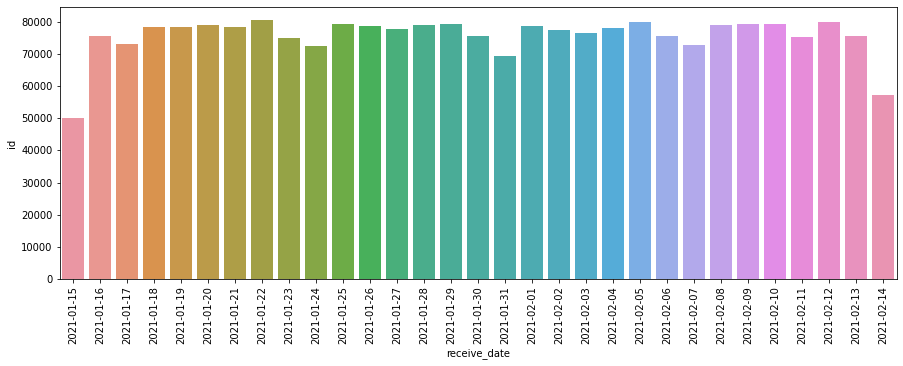

In [12]:
# 日毎で集計したものを可視化する
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x=daily_count['receive_date'], y=daily_count['id'])

## 日付から曜日を算出する

---
10. データ（data）に曜日情報（数値または名称、またはその両方）のカラムを追加してください。

In [13]:
# 曜日を0〜6の番号で扱う
data['dayofweek'] = data['receive_time'].dt.dayofweek
# 曜日を名称で表示
data['day_name'] = data['receive_time'].dt.day_name()
data.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,2021-01-15,4,Friday
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,2021-01-15,4,Friday
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,2021-01-15,4,Friday
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,2021-01-15,4,Friday
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,2021-01-15,4,Friday


In [14]:
# receive_dateと対応するdayofweek, day_nameだけを表示
data[['receive_date', 'dayofweek', 'day_name']].drop_duplicates(subset='receive_date').head(10)

,receive_date,dayofweek,day_name
0,2021-01-15,4,Friday
50166,2021-01-16,5,Saturday
125865,2021-01-17,6,Sunday
199063,2021-01-18,0,Monday
277428,2021-01-19,1,Tuesday
355776,2021-01-20,2,Wednesday
434668,2021-01-21,3,Thursday
513010,2021-01-22,4,Friday
593585,2021-01-23,5,Saturday
668686,2021-01-24,6,Sunday


## 特定範囲のデータに絞り込む

---
11. 同じくらいのデータ量がありそうな2021-01-20から2021-01-22の3日間について絞り込み、抽出したものを別のデータフレーム（data_extract）としてください。また、先頭の5行、末尾の５行を表示してください。

In [15]:
data_extract = data.loc[(data['receive_time'] >= dt.datetime(2021, 1, 20)) & (data['receive_time'] < dt.datetime(2021, 1, 23))].copy()
display(data_extract.head())
display(data_extract.tail())

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday


,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
593580,2620,1,2021-01-22 23:58:32.865,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593581,2621,1,2021-01-22 23:58:33.881,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593582,2622,1,2021-01-22 23:58:34.896,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593583,2623,1,2021-01-22 23:58:35.912,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday
593584,2624,1,2021-01-22 23:58:36.927,2,21150,19675,0,19701,21107,0,2021-01-22,4,Friday


---
12. 2021-01-20から2021-01-22の3日間のデータ（data_extract）について、取得日時（receive_time）をミリ秒で四捨五入し、新しい列名（receive_time_sec）として追加し、先頭5行を表示してください。また、ミリ秒で四捨五入したことで重複が発生していないか確認し、重複データがあった場合にはそれを表示すること。

In [16]:
# 一度、ミリ秒で四捨五入して秒単位に変更したものを用意
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.round('S')
data_extract.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:42
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


In [17]:
# 丸めたことで、重複が発生していないか確認
display(len(data_extract))
display(len(data_extract['receive_time_sec'].unique()))

237809

237807

In [18]:
# 重複データを表示する
# duplicatedでkeep=Falseにすることで、重複しているものを全てTrueとして返す -> フィルタでTrueだけを表示
data_extract[data_extract['receive_time_sec'].duplicated(keep=False)].head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578874,887,1,2021-01-22 19:15:06.530,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08
578877,890,1,2021-01-22 19:15:08.424,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:08


---
13. 2021-01-20から2021-01-22の3日間のデータ（data_extract）について、取得日時（receive_time）をミリ秒で切り捨てし、その値を列名（receive_time_sec）に代入し、先頭5行を表示してください。また、ミリ秒で切り捨てしたことで重複が発生していないか確認し、重複データがあった場合にはそれを表示すること。

In [19]:
# 四捨五入ではなく、ミリ秒を切り捨て
data_extract['receive_time_sec'] = data_extract['receive_time'].dt.floor('S')
display(data_extract.head())
display(len(data_extract))
display(len(data_extract['receive_time_sec'].unique()))

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
355776,0,1,2021-01-20 00:00:40.839,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:40
355777,1,1,2021-01-20 00:00:41.854,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:41
355778,2,1,2021-01-20 00:00:56.055,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:56
355779,3,1,2021-01-20 00:00:57.071,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:57
355780,4,1,2021-01-20 00:00:58.086,2,12109,11302,0,11318,12080,0,2021-01-20,2,Wednesday,2021-01-20 00:00:58


237809

237808

In [20]:
data_extract[data_extract['receive_time_sec'].duplicated(keep=False)].head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name,receive_time_sec
578875,888,1,2021-01-22 19:15:07.409,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07
578876,889,1,2021-01-22 19:15:07.546,2,20968,18976,1,19002,20925,1,2021-01-22,4,Friday,2021-01-22 19:15:07


In [21]:
# 重複データを削除(問題に記述ない？)
# data_extract = data_extract.drop_duplicates(subset=['receive_time_sec'])
min_received_time = data_extract['receive_time_sec'].min()
max_received_time = data_extract['receive_time_sec'].max()

display(len(data_extract))
display(f'{max_received_time}から{min_received_time}')

237809

'2021-01-22 23:58:36から2021-01-20 00:00:40'

## 秒単位のデータを整形する

---
13. 重複があり、データが抜けている箇所があるため、綺麗な秒単位のデータに整形する。2021-01-20から2021-01-22の3日間のデータ（data_extract）について、秒単位の日付データ（base_data）を作成してください。また、3日間のデータ（data_extract）と日付データ（base_data）を比較し、欠損値がいくつあるか確認してください。

In [22]:
# 秒単位の日付データを作成する
print(pd.date_range('2021-01-15', '2021-01-16', freq='S'))

DatetimeIndex(['2021-01-15 00:00:00', '2021-01-15 00:00:01',
               '2021-01-15 00:00:02', '2021-01-15 00:00:03',
               '2021-01-15 00:00:04', '2021-01-15 00:00:05',
               '2021-01-15 00:00:06', '2021-01-15 00:00:07',
               '2021-01-15 00:00:08', '2021-01-15 00:00:09',
               ...
               '2021-01-15 23:59:51', '2021-01-15 23:59:52',
               '2021-01-15 23:59:53', '2021-01-15 23:59:54',
               '2021-01-15 23:59:55', '2021-01-15 23:59:56',
               '2021-01-15 23:59:57', '2021-01-15 23:59:58',
               '2021-01-15 23:59:59', '2021-01-16 00:00:00'],
              dtype='datetime64[ns]', length=86401, freq='S')


In [23]:
base_data = pd.DataFrame({'receive_time_sec': pd.date_range(min_received_time, max_received_time, freq='S')})

display(base_data.head())
display(base_data.tail())
display(len(base_data))

,receive_time_sec
0,2021-01-20 00:00:40
1,2021-01-20 00:00:41
2,2021-01-20 00:00:42
3,2021-01-20 00:00:43
4,2021-01-20 00:00:44


,receive_time_sec
259072,2021-01-22 23:58:32
259073,2021-01-22 23:58:33
259074,2021-01-22 23:58:34
259075,2021-01-22 23:58:35
259076,2021-01-22 23:58:36


259077

In [24]:
# 欠損値の確認
display(len(base_data) - len(data_extract))

21268

---
14. 3日間のデータ（data_extract）と日付データ（base_data）を結合し、新しいデータフレーム（base_data_extract）としてください。また、先頭5行を表示してください。欠損値の確認を行い、13.と違いがないかを確認すること。

In [25]:
# 日付データにセンサーデータを結合する
base_data_extract = pd.merge(base_data, data_extract, on='receive_time_sec', how='left')

display(base_data_extract.head())
# 欠損の確認
display(base_data_extract.isna().sum())

,receive_time_sec,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,2021-01-20 00:00:40,0.0,1.0,2021-01-20 00:00:40.839,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
1,2021-01-20 00:00:41,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
2,2021-01-20 00:00:42,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-20 00:00:43,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-20 00:00:44,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


receive_time_sec        0
id                  21269
place               21269
receive_time        21269
sensor_num          21269
in1                 21269
out1                21269
state1              21269
in2                 21269
out2                21269
state2              21269
receive_date        21269
dayofweek           21269
day_name            21269
dtype: int64

## 欠損データの処理を行う
- 1. は売上データなどで利用。
- 2. や 3. は時系列データで用いられる

1. 0やデータの平均値等の特定値で埋める
2. 1つ前or1つ後のデータで埋める
3. 線形補間などで前後関係から計算した結果で埋める方法

---
15. データフレーム（base_data_extract）の欠損値補完を「前のデータで埋める」方針で実施してください。欠損値補完をおこなったデータフレームの先頭5行を表示してください。

In [26]:
# 欠損値の補完（2.の方法で行う）

# 念のためソートを実施
base_data_extract.sort_values('receive_time_sec', inplace=True)
# 前のデータで埋める（後ろの場合は、method='bfill'）
base_data_extract = base_data_extract.fillna(method='ffill')
base_data_extract.head()

,receive_time_sec,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,receive_date,dayofweek,day_name
0,2021-01-20 00:00:40,0.0,1.0,2021-01-20 00:00:40.839,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
1,2021-01-20 00:00:41,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
2,2021-01-20 00:00:42,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
3,2021-01-20 00:00:43,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday
4,2021-01-20 00:00:44,1.0,1.0,2021-01-20 00:00:41.854,2.0,12109.0,11302.0,0.0,11318.0,12080.0,0.0,2021-01-20,2.0,Wednesday


## 通った人数を可視化する
- in1（エリア1に入口から入場し出口から退場した人数（取得開始時からの累計））
- out1（エリア1に出口から入場し入口から退場した人数（取得開始時からの累計））

---
16. 通った人数を可視化するするため、データフレーム（base_data_extract）からreceive_time_sec, in1, out1を絞り込み抽出し、分析用のデータフレーム（data_analytics）としてください。また、先頭5行を表示すること。

In [27]:
# 分析を行うために、データを絞り込み
data_analytics = base_data_extract[['receive_time_sec', 'in1', 'out1']].copy()
data_analytics.head()

,receive_time_sec,in1,out1
0,2021-01-20 00:00:40,12109.0,11302.0
1,2021-01-20 00:00:41,12109.0,11302.0
2,2021-01-20 00:00:42,12109.0,11302.0
3,2021-01-20 00:00:43,12109.0,11302.0
4,2021-01-20 00:00:44,12109.0,11302.0


---
17. 1秒間での差を計算するために、分析用のデータフレーム（data_analytics）の1秒前のデータ（data_analytics_1sec）を作成してください。その上で、分析用のデータフレーム（data_analytics）と結合し、一つのデータフレームとし結果、先頭の5行を表示してください。なお、data_analytics_1secの列名は、一秒前の時間（receive_time_sec_before_1sec）、一秒前のin1(in1_before_1sec)、一秒前のout1(out1_before_1sec)とすること。

In [28]:
# 1秒前のデータの作成
data_analytics_1sec = data_analytics.shift(1)
data_analytics_1sec.head()

,receive_time_sec,in1,out1
0,NaT,NaN,NaN
1,2021-01-20 00:00:40,12109.0,11302.0
2,2021-01-20 00:00:41,12109.0,11302.0
3,2021-01-20 00:00:42,12109.0,11302.0
4,2021-01-20 00:00:43,12109.0,11302.0


In [29]:
data_analytics_1sec.columns = ['receive_time_sec_before_1sec', 'in1_before_1sec', 'out1_before_1sec']

In [30]:
# データを結合する
data_analytics = pd.concat([data_analytics, data_analytics_1sec], axis=1)
data_analytics.head()

,receive_time_sec,in1,out1,receive_time_sec_before_1sec,in1_before_1sec,out1_before_1sec
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0


---
18. 分析用のデータフレーム（data_analytics）のin1と一秒前のin1（in1_before_1sec）の差を求め、データフレーム(data_analytics)の新しい列名としてin1_calcとしてください。outについても同様の処理を実施すること。その上で、先頭の５行を表示してください。

In [31]:
data_analytics['in1_calc'] = data_analytics['in1'] - data_analytics['in1_before_1sec']
data_analytics['out1_calc'] = data_analytics['out1'] - data_analytics['out1_before_1sec']
data_analytics.head()

,receive_time_sec,in1,out1,receive_time_sec_before_1sec,in1_before_1sec,out1_before_1sec,in1_calc,out1_calc
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN,NaN,NaN
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0,0.0,0.0
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0,0.0,0.0
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0,0.0,0.0
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0,0.0,0.0


---
19. 分析用のデータフレーム（data_analytics）で可視化を検討する。秒単位でデータを可視化すると、多すぎるため１時間単位で集計を行いたい。　取得時間の秒単位（receive_time_sec）を１時間単位（2021/1/20 10）の形に変更し、データフレーム（data_analytics）の新しい列名としてdate_hourを追加してください。その上で、先頭の5行を表示すること。

In [32]:
# 可視化するのに、秒単位だと多すぎるため、１時間単位に変更する
data_analytics['date_hour'] = data_analytics['receive_time_sec'].dt.strftime('%Y/%m/%d/ %H')
data_analytics.head()

,receive_time_sec,in1,out1,receive_time_sec_before_1sec,in1_before_1sec,out1_before_1sec,in1_calc,out1_calc,date_hour
0,2021-01-20 00:00:40,12109.0,11302.0,NaT,NaN,NaN,NaN,NaN,2021/01/20/ 00
1,2021-01-20 00:00:41,12109.0,11302.0,2021-01-20 00:00:40,12109.0,11302.0,0.0,0.0,2021/01/20/ 00
2,2021-01-20 00:00:42,12109.0,11302.0,2021-01-20 00:00:41,12109.0,11302.0,0.0,0.0,2021/01/20/ 00
3,2021-01-20 00:00:43,12109.0,11302.0,2021-01-20 00:00:42,12109.0,11302.0,0.0,0.0,2021/01/20/ 00
4,2021-01-20 00:00:44,12109.0,11302.0,2021-01-20 00:00:43,12109.0,11302.0,0.0,0.0,2021/01/20/ 00


---
20. 可視化用のデータフレーム（viz_data）を用意する。抽出する列名は、date_hour, in1_calc, out1_calとし、１時間単位ごとで合計を求めること。その上で、データがどのようになっているか確認すること。

In [33]:
viz_data = data_analytics[['date_hour', 'in1_calc', 'out1_calc']].groupby('date_hour', as_index=False).sum()
viz_data

,date_hour,in1_calc,out1_calc
0,2021/01/20/ 00,3.0,7.0
1,2021/01/20/ 01,1.0,0.0
2,2021/01/20/ 02,1.0,0.0
3,2021/01/20/ 03,0.0,1.0
4,2021/01/20/ 04,1.0,2.0
...,...,...,...
67,2021/01/22/ 19,161.0,268.0
68,2021/01/22/ 20,39.0,232.0
69,2021/01/22/ 21,27.0,157.0
70,2021/01/22/ 22,7.0,82.0


---
21. 可視化用のデータフレーム（viz_data）を確認すると、in1_calc, out1_calcが横持ちデータになっているため、縦持ちデータに変更すること。その上で、データについて確認すること。

In [34]:
viz_data = pd.melt(viz_data, id_vars='date_hour', value_vars=['in1_calc', 'out1_calc'])
viz_data

,date_hour,variable,value
0,2021/01/20/ 00,in1_calc,3.0
1,2021/01/20/ 01,in1_calc,1.0
2,2021/01/20/ 02,in1_calc,1.0
3,2021/01/20/ 03,in1_calc,0.0
4,2021/01/20/ 04,in1_calc,1.0
...,...,...,...
139,2021/01/22/ 19,out1_calc,268.0
140,2021/01/22/ 20,out1_calc,232.0
141,2021/01/22/ 21,out1_calc,157.0
142,2021/01/22/ 22,out1_calc,82.0


---
22. 可視化用のデータフレーム（viz_data）を用い、in1_calc, out1_calc毎に折れ線グラフを描画してください。

<AxesSubplot:xlabel='date_hour', ylabel='value'>

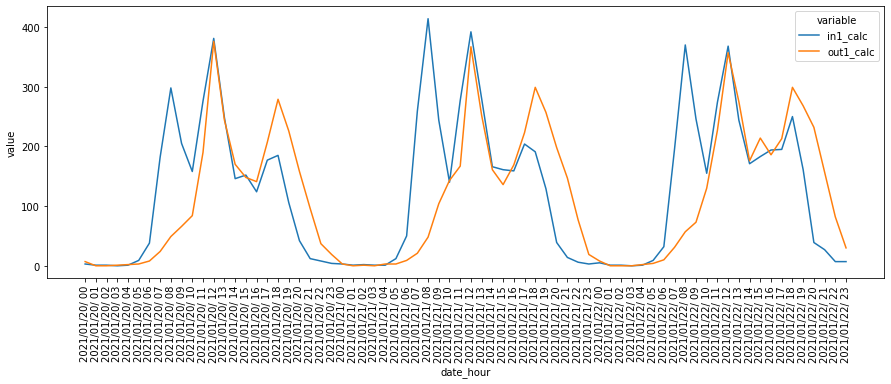

In [35]:
# 折れ線グラフで描画
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)

sns.lineplot(x=viz_data['date_hour'], y=viz_data['value'], hue=viz_data['variable'])

## 移動平均を計算して可視化する

---
23. 可視化用のデータフレーム（viz_data）で、3時間移動平均を算出し、22.と同じように折れ線グラフを描画してください。

In [36]:
viz_data = data_analytics[['date_hour', 'in1_calc', 'out1_calc']].groupby('date_hour', as_index=False).sum()
viz_data

,date_hour,in1_calc,out1_calc
0,2021/01/20/ 00,3.0,7.0
1,2021/01/20/ 01,1.0,0.0
2,2021/01/20/ 02,1.0,0.0
3,2021/01/20/ 03,0.0,1.0
4,2021/01/20/ 04,1.0,2.0
...,...,...,...
67,2021/01/22/ 19,161.0,268.0
68,2021/01/22/ 20,39.0,232.0
69,2021/01/22/ 21,27.0,157.0
70,2021/01/22/ 22,7.0,82.0


In [37]:
# 3時間移動平均を算出
viz_data_rolling = viz_data[['in1_calc', 'out1_calc']].rolling(3).mean()

In [38]:
viz_data_rolling

,in1_calc,out1_calc
0,NaN,NaN
1,NaN,NaN
2,1.666667,2.333333
3,0.666667,0.333333
4,0.666667,1.000000
...,...,...
67,202.000000,260.000000
68,150.000000,266.333333
69,75.666667,219.000000
70,24.333333,157.000000


<AxesSubplot:xlabel='date_hour', ylabel='value'>

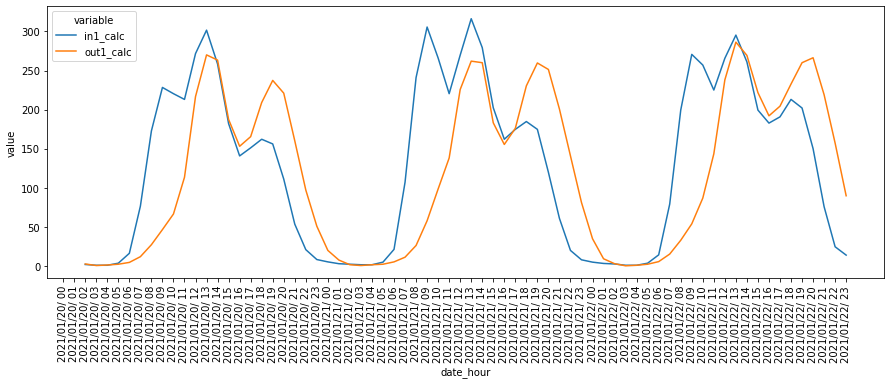

In [39]:
viz_data_rolling['date_hour'] = viz_data['date_hour']
viz_data_rolling = pd.melt(viz_data_rolling, id_vars='date_hour', value_vars=['in1_calc', 'out1_calc'])

plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.lineplot(x=viz_data_rolling['date_hour'], y=viz_data_rolling['value'], hue=viz_data_rolling['variable'])